In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib notebook
sns.set()

In [29]:
df = pd.read_csv('Gold_prices.csv')
df = df[df.columns[~df.columns.str.contains('Unnamed:')]]
df.columns = ['Date', 'Price']
df.head()


FileNotFoundError: File b'Gold_prices.csv' does not exist

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


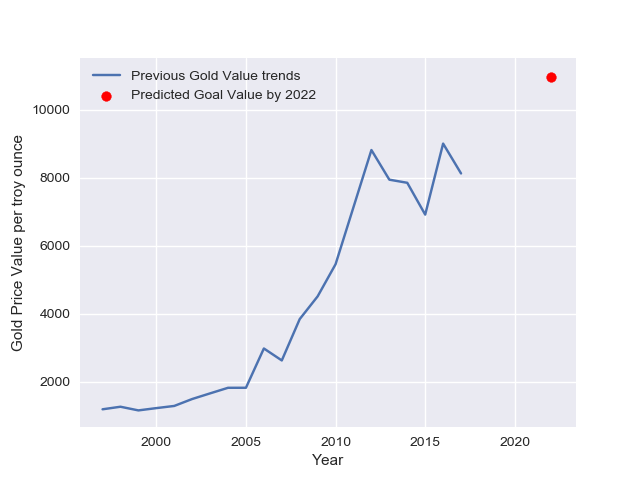

In [31]:
x = [i for i in range(0,len(df['Price']))] 

new_price = []
for i in df['Price']:
    i = str(i)[:2]+str(i)[3:8]
    i = float(i)
    new_price.append(i)    

df['Price'] = new_price
    

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

"""plt.figure(1)
plt.plot(df['Date'], df['Price'])
plt.show()"""

uniq_date =[]
a=1997

while(a<2018):
    for i in range(len(df['Date'])):
        if str(df['Date'][i]).startswith(str(a)+"-08"):
            uniq_date.append(df['Price'][i])
            break
    a += 1

    
year = []
for i in range(1997,2018):
    year.append(i)

    
slope = []
for i in range(len(uniq_date)-1):
    slope.append(uniq_date[i+1]-uniq_date[i])
slope.insert(0,0.000000)


df1 = pd.DataFrame(data={'Year':year, 'Price':uniq_date, 'Slope':slope})
df1 = df1[['Year', 'Slope', 'Price']]

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(df1['Year'].reshape(-1,1), df1['Price'])

pred_prices = []
year = []
for x in range(2022,2023):
    year.append(x)
    pred_prices.append(linreg.predict(x))
year,pred_prices



plt.figure(2)
plt.plot(df1['Year'], df1['Price'], label = 'Previous Gold Value trends')
plt.scatter(year,pred_prices, c='r', label= 'Predicted Goal Value by 2022')
plt.legend()

plt.xlabel("Year")
plt.ylabel("Gold Price Value per troy ounce")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()